In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

from scipy.special import kl_div
from scipy.spatial.distance import jensenshannon
import numpy as np

In [2]:
BASE = "/mnt/data/kgutjahr/datasets/DVM"
TABLES= os.path.join(BASE, "tables")
FEATURES = os.path.join(BASE, "images")

In [3]:
def get_color_counts(df: pd.DataFrame):
    color_counts = df["Color"].value_counts()
    color_percentages = df["Color"].value_counts(normalize=True) * 100

    # Optional: Combine into one DataFrame for clarity
    color_summary = pd.DataFrame({
        'Count': color_counts,
        'Percentage': color_percentages.round(3)
    })
    return color_summary

In [4]:
def plot_color_distributions(df: pd.DataFrame):
    plt.figure(figsize=(10, 6))
    ax = df["Count"].plot(kind='bar', color='skyblue', edgecolor='black', width=1)

    # Customize the plot
    plt.title('Color distribution')
    plt.xlabel('Colors')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, fontsize=10)  # Rotate labels for better readability
    plt.tight_layout()

    # Show the plot
    plt.show()

## Get color distribution of entire Dataset

In [5]:
ad_data_path = os.path.join(FEATURES, "full_data_df_all_views.csv")
ad_data = pd.read_csv(ad_data_path)
print(ad_data.shape)

(184562, 21)


/tmp/ipykernel_520590/1914616552.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  ad_data = pd.read_csv(ad_data_path)


In [6]:
color_counts = get_color_counts(df=ad_data)
color_counts

,Count,Percentage
Black,35763,19.377
Silver,31622,17.134
Blue,29064,15.748
Grey,27289,14.786
White,24216,13.121
Red,20331,11.016
Green,3672,1.990
Brown,2349,1.273
Yellow,2346,1.271
Orange,2045,1.108


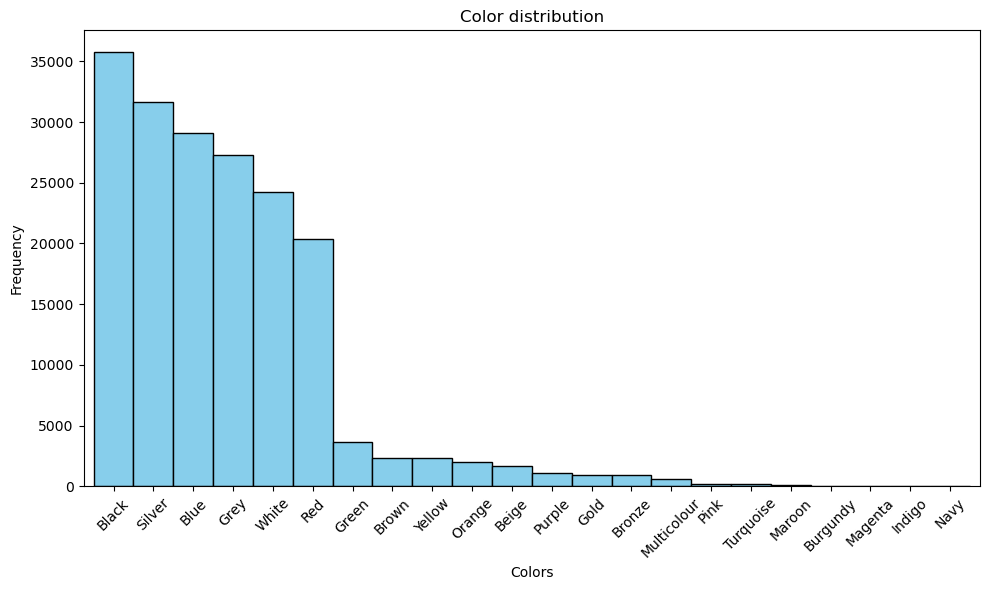

In [7]:
plot_color_distributions(df=color_counts)

## Plot Color Distribution of splits

In [8]:
color_coding = {0: 'Beige',
                1: 'Black',
                2: 'Blue', 
                3: 'Bronze', 
                4: 'Brown', 
                5: 'Burgundy', 
                6: 'Gold', 
                7: 'Green', 
                8: 'Grey', 
                9: 'Indigo', 
                10: 'Magenta', 
                11: 'Maroon', 
                12: 'Multicolour', 
                13: 'Navy', 
                14: 'Orange', 
                15: 'Pink', 
                16: 'Purple', 
                17: 'Red', 
                18: 'Silver', 
                19: 'Turquoise', 
                20: 'White', 
                21: 'Yellow'}

In [9]:
train_df = pd.read_csv(os.path.join(FEATURES,f'dvm_full_features_train_noOH_all_views.csv'))
train_df['Color'] = train_df['Color'].map(color_coding)
val_df = pd.read_csv(os.path.join(FEATURES,f'dvm_full_features_val_noOH_all_views.csv'))
val_df['Color'] = val_df['Color'].map(color_coding)
test_df = pd.read_csv(os.path.join(FEATURES,f'dvm_full_features_test_noOH_all_views.csv'))
test_df['Color'] = test_df['Color'].map(color_coding)

### Training Split

In [10]:
train_color_counts = get_color_counts(df=train_df)
train_color_counts

,Count,Percentage
Black,13519,19.158
Silver,11977,16.973
Blue,11055,15.666
Grey,10509,14.893
White,9375,13.286
Red,7895,11.188
Green,1381,1.957
Brown,918,1.301
Yellow,895,1.268
Orange,786,1.114


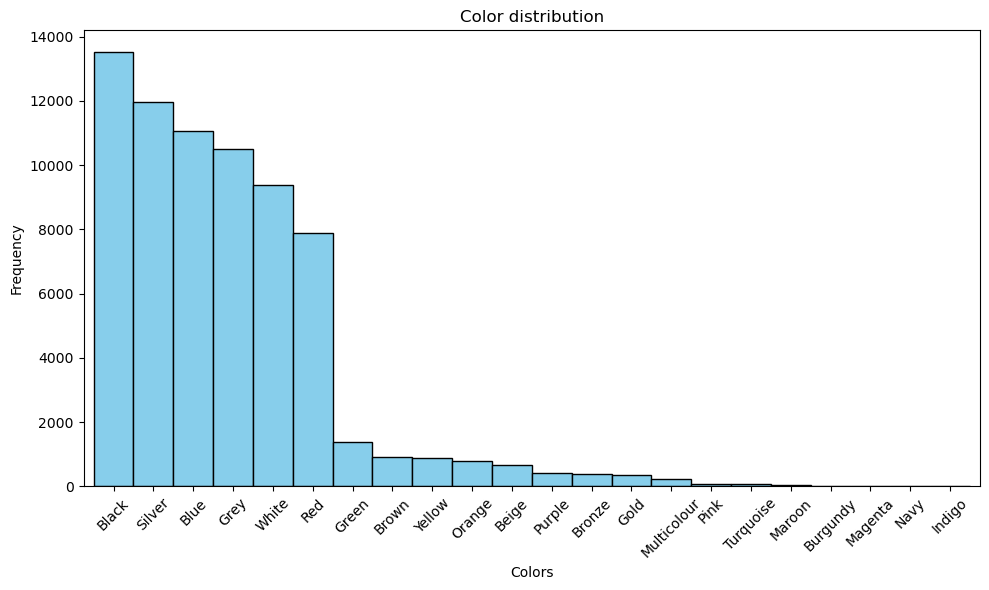

In [11]:
plot_color_distributions(df=train_color_counts)

### Validation Split

In [12]:
val_color_counts = get_color_counts(df=val_df)
val_color_counts

,Count,Percentage
Black,3469,19.663
Silver,3022,17.130
Blue,2823,16.002
Grey,2559,14.505
White,2318,13.139
Red,1843,10.447
Green,344,1.950
Yellow,235,1.332
Brown,233,1.321
Orange,202,1.145


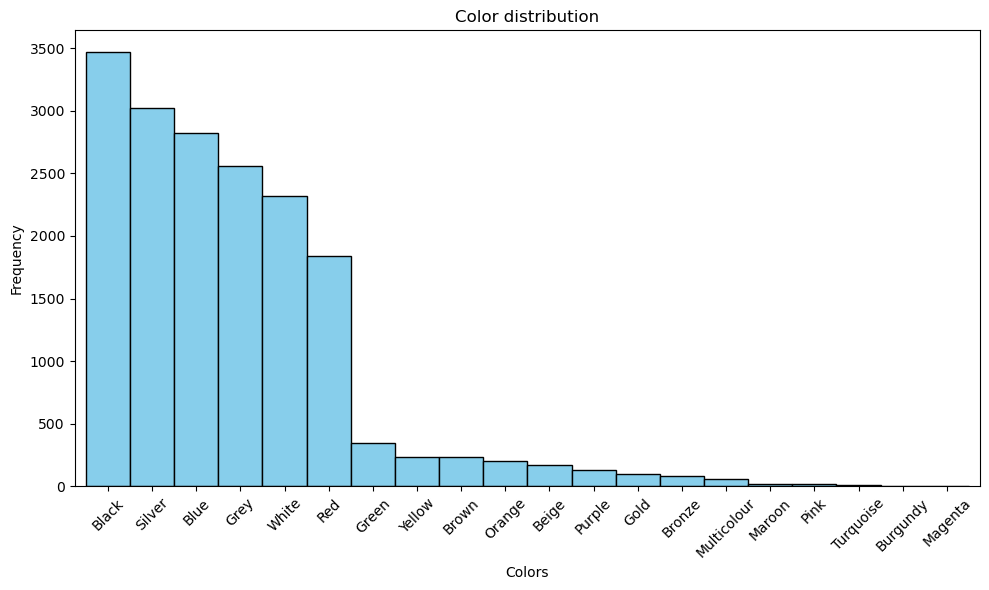

In [13]:
plot_color_distributions(df=val_color_counts)

### Test Split

In [14]:
test_color_counts = get_color_counts(df=test_df)
test_color_counts

,Count,Percentage
Black,17017,19.292
Silver,14903,16.895
Blue,13915,15.775
Grey,13082,14.831
White,11676,13.237
Red,9776,11.083
Green,1775,2.012
Brown,1149,1.303
Yellow,1103,1.250
Orange,978,1.109


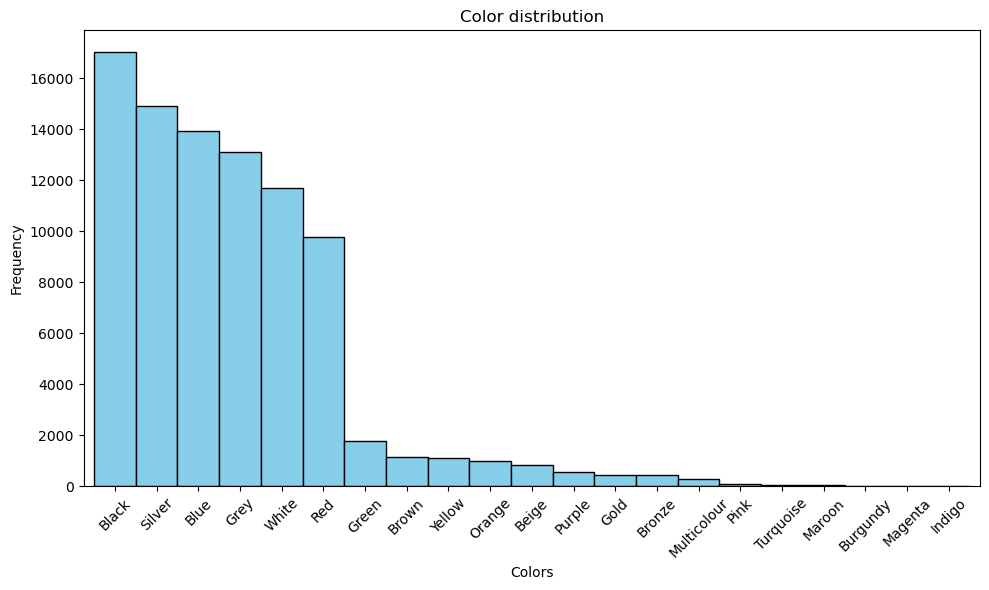

In [15]:
plot_color_distributions(df=test_color_counts)

## See if distribution are the same

In [16]:
def plot_compare_distribution(train_dist: pd.DataFrame, val_dist: pd.DataFrame, test_dist: pd.DataFrame):
    train_colors = train_dist.index
    val_colors = val_dist.index
    test_colors = test_dist.index

    plt.figure(figsize=(12, 6))
    plt.plot(train_colors, train_dist, label='Train', marker='o')
    plt.plot(val_colors, val_dist, label='Validation', marker='s')
    plt.plot(test_colors, test_dist, label='Test', marker='^')
    plt.xticks(rotation=45)
    plt.ylabel('Relative Frequency')
    plt.title('Color Distribution Comparison')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [17]:
def calc_KL(first_dist: pd.DataFrame, second_dist: pd.DataFrame):
    kl = np.sum(kl_div(first_dist, second_dist))  # KL(train || val)
    return kl

In [18]:
def calc_JS(first_dist: pd.DataFrame, second_dist: pd.DataFrame):
    js = jensenshannon(first_dist, second_dist)
    return js

#### Calculate Kullback-Leibler divergence

In [19]:
train_dist = train_color_counts['Count'] / train_color_counts['Count'].sum()
val_dist = val_color_counts['Count'] / val_color_counts['Count'].sum()
test_dist = test_color_counts['Count'] / test_color_counts['Count'].sum()

In [20]:
train_val_kl = calc_KL(first_dist=train_dist, second_dist=val_dist)
train_val_kl

0.0009321821806920966

In [21]:
train_test_kl = calc_KL(first_dist=train_dist, second_dist=test_dist)
train_test_kl

0.00016459560488363636

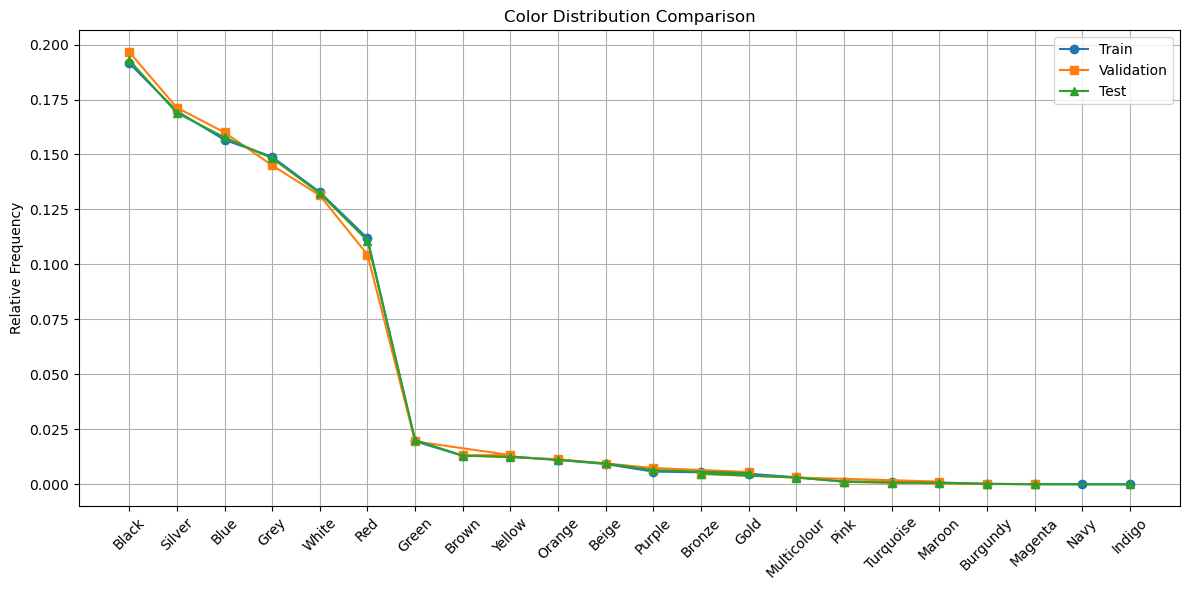

In [22]:
plot_compare_distribution(train_dist=train_dist, val_dist=val_dist, test_dist=test_dist)